In [ ]:
# Importing needed liberies for initial data loading and dataframes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
# Load the dataset by downloading training dataset
train_data=pd.read_csv("/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/train.csv")
test_data=pd.read_csv("/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/test.csv")
sample_data=pd.read_csv("/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/sample.csv.csv")


In [ ]:
print(train_data.info())
train_data.hist(bins = 50, edgecolor = 'red', figsize=(24,12))
plt.subplots_adjust(hspace = 0.5,wspace = 0.3)
plt.show()

In [ ]:
sns.catplot(data=train_data, x='store_and_fwd_flag', kind='count')
sns.catplot(data=train_data, x='payment_type', kind='count')

In [ ]:
train_data.head()

In [ ]:
train_data.shape

In [ ]:
# * The train data has 175000 samples and 17 columns, one of them is total_amount which is our target.
# * 2 Variables,tpep_pickup_datetime and tpep_dropoff_datetime are object type,their values are datetime.so we have to convert them into int or float.
# * 2 Variables, store_and_fwd_flag and payment_type are object type, their values are categorical.so we have to convert them int or float.
# * 4 Variables, passenger_count,RatecodeID,congestion_surcharge,Airport_fee  are int/float values, but they have null values in many rows. 
# * 1 Variables, store_and_fwd_flag which is categorical also has null values in between.

In [ ]:
train_data.isnull().sum()

In [ ]:
train_data.info()

In [ ]:
train_data.describe()

In [ ]:
train_data.shape

In [ ]:
train_data.head()

OUTLIERS

**Plotting Boxplot**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
train_data.plot(kind='box',sharey = False, subplots=True, figsize=(16,10),patch_artist=True,return_type='both')
plt.subplots_adjust(wspace = 3)
plt.show()

In [ ]:
train_data.info()

**Checking present null values**

In [ ]:
train_data.isnull().sum()

In [ ]:
Categorical_columns=train_data.select_dtypes(include='object')
Categorical_columns.columns

In [ ]:
train_data['store_and_fwd_flag'].unique()

In [ ]:
train_data['payment_type'].unique()

In [ ]:
Numirical_columns=train_data.select_dtypes(include='number')

In [ ]:
Numirical_columns.columns

**Checking present null values**

In [ ]:
train_data.isnull().sum()

In [ ]:
train_data.info()

In [ ]:
# Finding out numerical cols and categorical columns to apply necessary seperate preprocessing for them. 
numcols = train_data.select_dtypes(include = 'number').columns.to_list()
catcols = train_data.select_dtypes(exclude = 'number').columns.to_list()
numcols.remove('total_amount')
print(numcols,len(numcols))
print(catcols,len(catcols))

* Removing null values using SimpleImputer in ****Training Data**** for numeric values
* Using mean in the Imputer
* Replacing 'Nan' and 'Unknown' values in ****Training Data**** for Categorical values

In [ ]:
si = SimpleImputer(strategy= 'mean')
train_data[numcols]= si.fit_transform(train_data[numcols])

In [ ]:
train_data[catcols] = train_data[catcols].fillna(train_data[catcols].mode().iloc[0])

* Same steps using for ****Test data**** 

In [ ]:
si = SimpleImputer(strategy= 'mean')
test_data[numcols]= si.fit_transform(test_data[numcols])

In [ ]:
test_data[catcols] = test_data[catcols].fillna(test_data[catcols].mode().iloc[0])

In [ ]:
train_data.plot(kind='box',sharey = False, subplots=True, figsize=(16,10),patch_artist=True,return_type='both')
plt.subplots_adjust(wspace = 3)
plt.show()

****Handling Outliers****

In [ ]:
train_data = train_data[train_data['trip_distance'] < 300] # 4 outliers are removed where trip distances are more than 1000, which is unrealistic.
train_data = train_data[train_data['tip_amount'] < 200] # 1 outlier is removed where tip amount is 484,which is very high compared to fare.
train_data.describe()

In [ ]:
train_data.isnull().sum()

 **Data preprocessing (a) for 'tpep_dropoff_datetime' and 'tpep_pickup_datetime**'

* As tpep_pickup_datetime and tpep_dropoff_datetime columns are object variables,we will convert them into int values with help of pandas datetime.
* A new column Total_travel_time is created. 
* After adding column Total_travel_time, pickup and dropoff time will be dropped from the dataset as we do not need that anymore.

In [ ]:
train_data.head()

In [ ]:
train_data['Total_travel_time'] = (((pd.to_datetime(train_data['tpep_dropoff_datetime']))- (pd.to_datetime(train_data['tpep_pickup_datetime']))).dt.total_seconds()/60)
train_data['Total_travel_time'] = train_data['Total_travel_time'].abs()
# Impoting calendar to convert data and time data in better understanding form.
import calendar
train_data['tpep_pickup_datetime'] = pd.to_datetime(train_data['tpep_pickup_datetime'], errors='coerce')
train_data['pickup-day']=train_data['tpep_pickup_datetime'].apply(lambda x:x.day)
train_data['pickup-hour']=train_data['tpep_pickup_datetime'].apply(lambda x:x.hour)
train_data['pickup-mint']=train_data['tpep_pickup_datetime'].apply(lambda x:x.minute)
train_data['pickup-sec']=train_data['tpep_pickup_datetime'].apply(lambda x:x.second)
train_data['pickup-day_of_week']=train_data['tpep_pickup_datetime'].apply(lambda x:calendar.day_name[x.weekday()])
train_data['pickup-month']=train_data['tpep_pickup_datetime'].apply(lambda x:x.month)
train_data['pickup-year']=train_data['tpep_pickup_datetime'].apply(lambda x:x.year)

# Same thing we will do for 'tpep_dropoff_datetime'
train_data['tpep_dropoff_datetime'] = pd.to_datetime(train_data['tpep_dropoff_datetime'], errors='coerce')
train_data['dropoff-day']=train_data['tpep_dropoff_datetime'].apply(lambda x:x.day)
train_data['dropoff-hour']=train_data['tpep_dropoff_datetime'].apply(lambda x:x.hour)
train_data['dropoff-mint']=train_data['tpep_pickup_datetime'].apply(lambda x:x.minute)
train_data['dropoff-sec']=train_data['tpep_pickup_datetime'].apply(lambda x:x.second)
train_data['dropoff-day_of_week']=train_data['tpep_dropoff_datetime'].apply(lambda x:calendar.day_name[x.weekday()])
train_data['dropoff-month']=train_data['tpep_dropoff_datetime'].apply(lambda x:x.month)
train_data['dropoff-year']=train_data['tpep_dropoff_datetime'].apply(lambda x:x.year)
train_data = train_data.drop(columns = ['tpep_pickup_datetime', 'tpep_dropoff_datetime'])
train_data.head()

**Adding pickup-hour,pickup-mint,pickup-sec together to get total time taken**

In [ ]:
train_data['Pickup_TotalHours'] = train_data['pickup-hour'] + train_data['pickup-mint'] / 60 + train_data['pickup-sec'] / 3600
train_data['dropoff_TotalHours'] = train_data['dropoff-hour'] + train_data['dropoff-mint'] / 60 + train_data['dropoff-sec'] / 3600

In [ ]:
train_data['travel_time'] = (train_data['Pickup_TotalHours'])- (train_data['dropoff_TotalHours'])
train_data['travel_time']=train_data['travel_time'].abs()


In [ ]:
# Converting categorical variable(pickup-day_of_week) into the numaricle value
days={'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7}
train_data['pickup-day_of_week'] = train_data['pickup-day_of_week'].map(days)
train_data['dropoff-day_of_week'] = train_data['dropoff-day_of_week'].map(days)

**We will do Same thing on test data also**

In [ ]:
test_data['Total_travel_time'] = (((pd.to_datetime(test_data['tpep_dropoff_datetime']))- (pd.to_datetime(test_data['tpep_pickup_datetime']))).dt.total_seconds()/60)
test_data['Total_travel_time'] = test_data['Total_travel_time'].abs()
# Impoting calendar to convert data and time data in better understanding form.
import calendar
test_data['tpep_pickup_datetime'] = pd.to_datetime(test_data['tpep_pickup_datetime'], errors='coerce')
test_data['pickup-day']=test_data['tpep_pickup_datetime'].apply(lambda x:x.day)
test_data['pickup-hour']=test_data['tpep_pickup_datetime'].apply(lambda x:x.hour)
test_data['pickup-mint']=test_data['tpep_pickup_datetime'].apply(lambda x:x.minute)
test_data['pickup-sec']=test_data['tpep_pickup_datetime'].apply(lambda x:x.second)
test_data['pickup-day_of_week']=test_data['tpep_pickup_datetime'].apply(lambda x:calendar.day_name[x.weekday()])
test_data['pickup-month']=test_data['tpep_pickup_datetime'].apply(lambda x:x.month)
test_data['pickup-year']=test_data['tpep_pickup_datetime'].apply(lambda x:x.year)

# for dropoff data
test_data['tpep_dropoff_datetime'] = pd.to_datetime(test_data['tpep_dropoff_datetime'], errors='coerce')
test_data['dropoff-day']=test_data['tpep_dropoff_datetime'].apply(lambda x:x.day)
test_data['dropoff-hour']=test_data['tpep_dropoff_datetime'].apply(lambda x:x.hour)
test_data['dropoff-mint']=test_data['tpep_pickup_datetime'].apply(lambda x:x.minute)
test_data['dropoff-sec']=test_data['tpep_pickup_datetime'].apply(lambda x:x.second)
test_data['dropoff-day_of_week']=test_data['tpep_dropoff_datetime'].apply(lambda x:calendar.day_name[x.weekday()])
test_data['dropoff-month']=test_data['tpep_dropoff_datetime'].apply(lambda x:x.month)
test_data['dropoff-year']=test_data['tpep_dropoff_datetime'].apply(lambda x:x.year)

test_data = test_data.drop(columns = ['tpep_pickup_datetime', 'tpep_dropoff_datetime'])
test_data.head()

**Adding pickup-hour,pickup-mint,pickup-sec together to get total time taken**

In [ ]:
test_data['Pickup_TotalHours'] = test_data['pickup-hour'] + test_data['pickup-mint'] / 60 + test_data['pickup-sec'] / 3600
test_data['dropoff_TotalHours'] = test_data['dropoff-hour'] + test_data['dropoff-mint'] / 60 + test_data['dropoff-sec'] / 3600

In [ ]:
test_data['travel_time'] = (test_data['Pickup_TotalHours'])- (test_data['dropoff_TotalHours'])
test_data['travel_time']=test_data['travel_time'].abs()


In [ ]:
# Converting categorical variable(pickup-day_of_week) into the numaricle value
days={'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7}
test_data['pickup-day_of_week'] = test_data['pickup-day_of_week'].map(days)
test_data['dropoff-day_of_week'] = test_data['dropoff-day_of_week'].map(days)


In [ ]:
train_data.head()

In [ ]:
train_data['travel_time'].unique()

In [ ]:
train_data.columns

**Deleting those columns which are no longer needed**

In [ ]:
train_data=train_data.drop(columns=['pickup-hour', 'pickup-mint', 'pickup-sec','dropoff-hour','dropoff-mint','dropoff-sec'])
test_data=test_data.drop(columns=['pickup-hour', 'pickup-mint', 'pickup-sec','dropoff-hour','dropoff-mint','dropoff-sec'])

In [ ]:
train_data.info()

In [ ]:
test_data.info()

In [ ]:
train_data.describe()

In [ ]:
test_data.describe()

****feature extraction using one-hot incoder****


In [ ]:
# Perform One-Hot Encoding using get_dummies
train_data= pd.get_dummies(train_data, columns = ['payment_type', 'store_and_fwd_flag'], prefix=['o_hot','o_hot'],dtype=bool)
train_data=train_data*1
train_data.info()

In [ ]:
# Perform One-Hot Encoding using get_dummies
test_data= pd.get_dummies(test_data, columns = ['payment_type', 'store_and_fwd_flag'], prefix=['o_hot','o_hot'],dtype=bool)
test_data=test_data*1
test_data.info()

****Removing unnecessery columns on the basis of heat map****

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Create a heatmap
plt.figure(figsize=(24, 10))
sns.heatmap(train_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
corr_matrix = train_data.corr()

corr_matrix

In [ ]:
# train_data= train_data.drop(columns=['pickup-month','dropoff-month','pickup-year','dropoff-year','store_and_fwd_flag'])
# test_data= test_data.drop(columns=['pickup-month','dropoff-month','pickup-year','dropoff-year','store_and_fwd_flag'])

In [ ]:
train_data.columns

In [ ]:
test_data.columns

In [ ]:
train_data.shape

In [ ]:
test_data.shape

**Spliting the of data into target and features**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

target = train_data['total_amount']
features= train_data.drop(['total_amount'],axis=1)
features.shape
x_train,x_val,y_train,y_val= train_test_split(features,target,test_size=0.2,random_state=42)
x_train.shape


**FEATURE SCALING**

**Importing MinMaxScaler**

* I used Standardization before but the data distribution for both scalers wis same

In [ ]:
from sklearn.preprocessing import  MinMaxScaler
# mms = MinMaxScaler()
# Xtrainmms = mms.fit_transform(x_train)
# Xtestmms = mms.transform(x_val)

****Model 1****

Decision trees

* Decision trees seems to be a good model here as i got good score in it but it is not the best model here.

* Fitting 5 folds for each of 36 candidates, totalling 180 fits

* Best Parameters: {'max_depth': 15, 'min_samples_leaf': 4, 'min_samples_split': 2}

* Mean Squared Error: 36.12818409194932

* (Training data)R-squared: 0.9443837540994324

* (for test data)(submision score):0.90901

In [ ]:
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.model_selection import GridSearchCV, train_test_split
# from sklearn.metrics import mean_squared_error, r2_score

# # x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

# # Define the decision tree regressor
# dt_regressor = DecisionTreeRegressor()

# # Define the parameter grid for GridSearchCV
# param_grid = {
#     'max_depth': [None, 5, 10, 15],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# # Create the GridSearchCV object
# grid_search = GridSearchCV(dt_regressor, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)

# # Fit the model to the training data
# grid_search.fit(x_train, y_train)

# # Get the best parameters and the best estimator
# best_params = grid_search.best_params_
# best_estimator = grid_search.best_estimator_

# # Print the best parameters
# print("Best Parameters:", best_params)

# # Make predictions on the test set using the best estimator
# y_pred = best_estimator.predict(x_val)

# # Evaluate the model
# mse = mean_squared_error(y_val, y_pred)
# r2 = r2_score(y_val, y_pred)

# print(f'Mean Squared Error: {mse}')
# print(f'R-squared: {r2}')

**Scatter Plot**

In [ ]:
# plt.scatter(range(len(y_val)), y_val, color = 'red')
# plt.scatter(range(len(y_pred)),y_pred,color = 'blue')
# plt.legend(['Test','Prediction'],loc='lower right')
# plt.show()

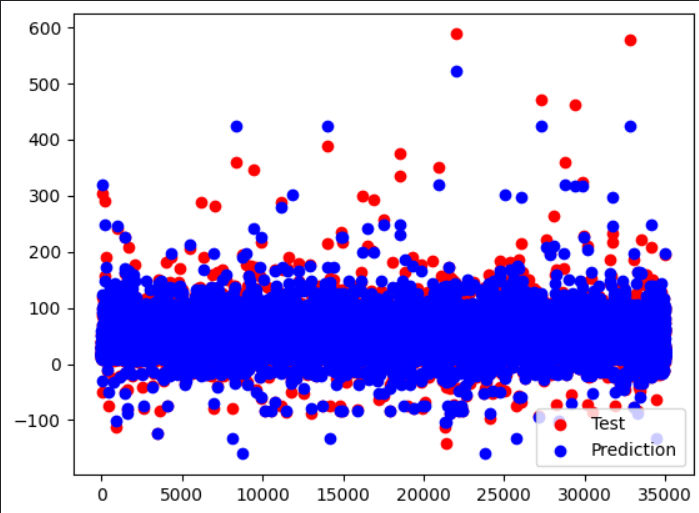

****Model 2****

****Bagging regressior****

* Bagging_regressor seems to be best model as i got **higest score** in it
* (For train data)Mean Squared Error: 27.943219104202978
* (For train data) R-squared:R-squared: 0.9569838068529135
* (For test data)(Submission Score) R-squared:0.93029

In [ ]:
# # Import necessary libraries
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import BaggingRegressor
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.metrics import mean_squared_error, r2_score
# import numpy as np

# # Create a decision tree regressor as the base learner
# base_regressor = DecisionTreeRegressor()

# # Create a BaggingRegressor
# bagging_regressor= BaggingRegressor(base_regressor, n_estimators=10, random_state=42)

# # Train the BaggingRegressor on the training data
# bagging_regressor.fit(x_train, y_train)

# # Make predictions on the test set
# predictions = bagging_regressor.predict(x_val)

# # Evaluate the performance
# mse = mean_squared_error(y_val, predictions)
# r2 = r2_score(y_val, predictions)

# print(f'Mean Squared Error: {mse}')
# print(f'R-squared: {r2}')


****Scatter Plot****

In [ ]:
# plt.scatter(range(len(y_val)), y_val, color = 'red')
# plt.scatter(range(len(predictions)),predictions,color = 'blue')
# plt.legend(['Test','Prediction'],loc='lower right')
# plt.show()

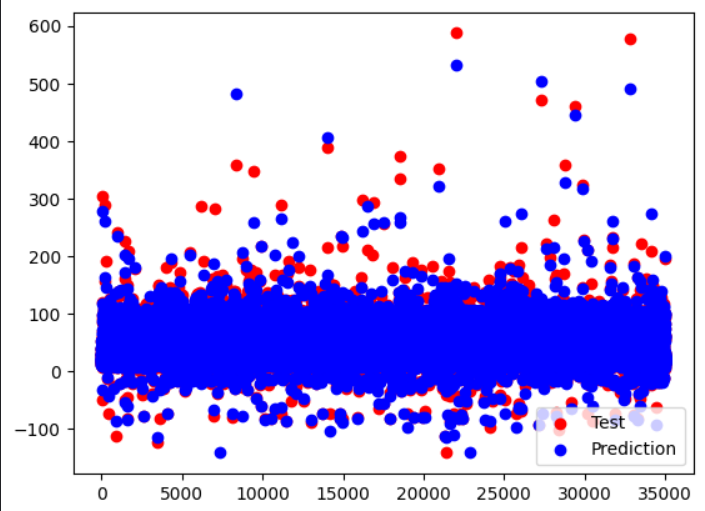

****Model 3****

****AdaboostingRegressor****

* AdaboostingRegressor is **not a good choice** here because of low score

* Mean Squared Error: 195.98652247536432

* (Train data)R-squared: 0.6982955301754037

* (Test data)(Submission Score):0.66745

In [ ]:
# # Import necessary libraries
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import AdaBoostRegressor
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.metrics import mean_squared_error, r2_score
# import numpy as np

# # Create a decision tree regressor as the base learner
# base_regressor = DecisionTreeRegressor(max_depth=4)  # You can adjust max_depth as needed

# # Create an AdaBoostRegressor
# adaboost_regressor = AdaBoostRegressor(base_regressor, n_estimators=50, learning_rate=1.0, random_state=42)

# # Train the AdaBoostRegressor on the training data
# adaboost_regressor.fit(x_train, y_train)

# # Make predictions on the test set
# predictions = adaboost_regressor.predict(x_val)

# # Evaluate the performance
# mse = mean_squared_error(y_val, predictions)
# r2 = r2_score(y_val, predictions)

# print(f'Mean Squared Error: {mse}')
# print(f'R-squared: {r2}')


**Scatter Plot**

In [ ]:
# plt.scatter(range(len(y_val)), y_val, color = 'red')
# plt.scatter(range(len(predictions)),predictions,color = 'blue')
# plt.legend(['Test','Prediction'],loc='lower right')
# plt.show()

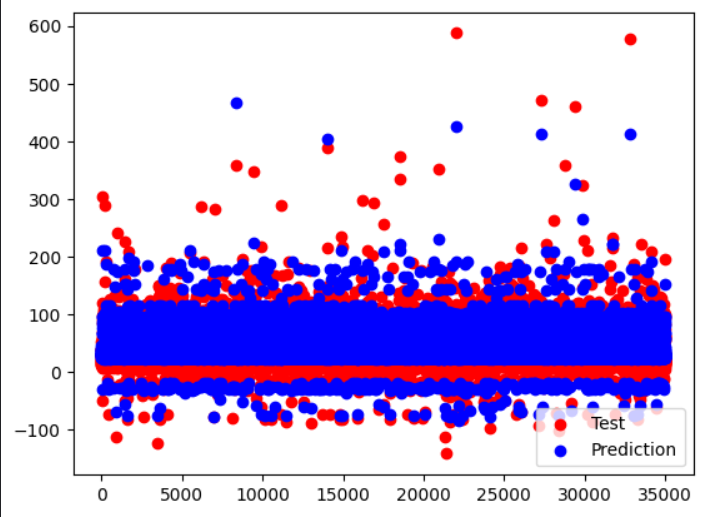

**Model 4**

**Random Forest**

* Random Forest seems to be **second best model** as i got second best score in it

* Fitting 5 folds for each of 10 candidates, totalling 50 fits

* Best Parameters:  {'max_depth': 17, 'min_samples_leaf': 10, 'min_samples_split': 17, 'n_estimators': 24}

* Mean Squared Error: 27.18083880233378

* (Train data)R-squared for training data: 0.9581574260481266

* (Test data)(Submission score)R-squared for test data: 0.92868

In [ ]:
# #Random Forest

# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.ensemble import RandomForestRegressor
# from scipy.stats import randint
# from sklearn.metrics import make_scorer, r2_score

# # Define the parameter distributions
# param_dist = {
#     'n_estimators': randint(10, 200),
#     'max_depth': randint(1, 20),
#     'min_samples_split': randint(2, 20),
#     'min_samples_leaf': randint(1, 20),
# }

# # Create a RandomForestRegressor
# rf_regressor = RandomForestRegressor()

# # Create a RandomizedSearchCV object with r2_score as the scoring metric
# r2_scorer = make_scorer(r2_score)
# random_search = RandomizedSearchCV(
#     rf_regressor,
#     param_distributions=param_dist,
#     n_iter=10,  # Number of parameter settings sampled
#     cv=5,  # Number of cross-validation folds
#     n_jobs=-1,  # Use all available cores
#     verbose=2,  # Increase verbosity
#     scoring=r2_scorer,  # Use R-squared as the scoring metric
#     random_state=42  # Set a random seed for reproducibility
# )

# # Assuming X and y are your feature matrix and target variable
# # Fit the random search model
# random_search.fit(x_train, y_train)

# # Print the best parameters and corresponding mean cross-validated score
# print("Best Parameters: ", random_search.best_params_)
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import r2_score, mean_squared_error
# from sklearn.model_selection import train_test_split

# # # Assuming X and y are your feature matrix and target variable
# # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Use the best parameters from the RandomizedSearchCV results
# best_params = random_search.best_params_

# # Create a RandomForestRegressor with the best parameters
# best_rf_regressor = RandomForestRegressor(**best_params)

# # Fit the model on the training set
# best_rf_regressor.fit(x_train, y_train)

# # Make predictions on the test set
# y_pred = best_rf_regressor.predict(x_val)

# # Evaluate the model performance on the test set
# r2 = r2_score(y_val, y_pred)
# mse = mean_squared_error(y_val, y_pred)

# print(f'Mean Squared Error: {mse}')
# print(f'R-squared for training data: {r2}')

**Scatter Plot**

In [ ]:
# plt.scatter(range(len(y_val)), y_val, color = 'red')
# plt.scatter(range(len(y_pred)),y_pred,color = 'blue')
# plt.legend(['Test','Prediction'],loc='lower right')
# plt.show()

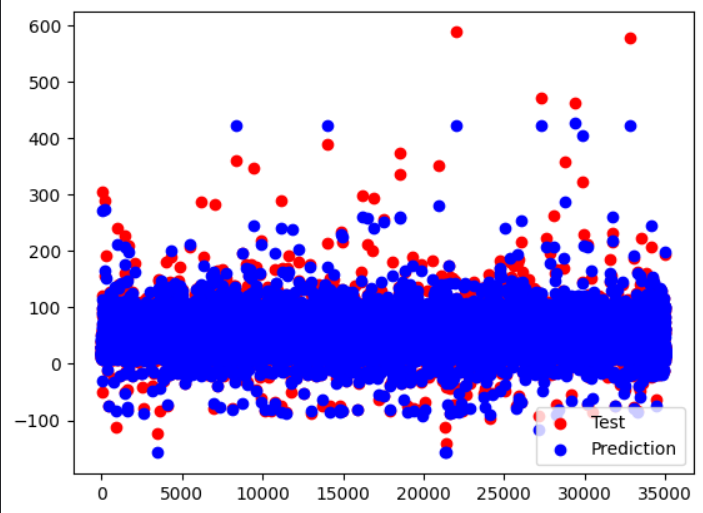

In [ ]:
# Make predictions on the test set
y_pred1 =best_rf_regressor.predict(test_data)

output = y_pred1



In [ ]:
output.shape


In [ ]:
output = pd.DataFrame({'ID': np.arange(1,50001), 'total_amount': output})

output.to_csv("submission.csv", index=False)


In [ ]:
output.shape

In [ ]:
output